In [5]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
az.style.use('arviz-darkgrid')
np.random.seed(44)


In [2]:
import seaborn as sns
sns.set_theme()
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams.update({
    "figure.figsize": [7, 3],
    'figure.facecolor': '#fffff8',
    'axes.facecolor': '#fffff8',
    'figure.constrained_layout.use': True,
    'font.size': 14.0,
    'hist.bins': 'auto',
    'lines.linewidth': 3.0,
    'lines.markeredgewidth': 2.0,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 8.0, 
})
sns.set(rc={'figure.figsize':(7,3)})

# Linear regression


Giorgio Corani <br/>
*Bayesian Data Analysis and Probabilistic Programming*
<br/>
<br/>
``giorgio.corani@supsi.ch``





# Based on.. 


*   Chapter 3 of O. Martin, *Bayesian Analysis with Python, Second Edition*.


* Chapter 8 of *the Bayes rule book* https://www.bayesrulesbook.com/chapter-10.html


*  Notebook by G. Corani

# Linear regression

* We want to predict the value of $Y$ given the observation of $X$.


* $X$ and $Y$ are random variables:
    *  $Y$ is the *dependent* (or  *response*) variable
    *  $Y$  is the *independent*  variable   (or *explanatory variable*   or *covariate*)


* Random variables are denoted by uppercase variables, observations are denoted by lowercase variables.


* We have paired observations  (*instances*)  $\{(x_1,y_1), (x_2,y_2), (x_3,y_3),\dots (x_n,y_n)\}$. 



# Simple linear regression

* Simple linear regression is based on a single explanatory variable:

$$Y = \beta_0 +  \beta_1 X  + \epsilon$$


* $\beta_0$ (*intercept*):  predicted value of $Y$ for $X$ = 0.  However $X$=0 could be far from the observed data, in which case we  think of $\alpha$ as a constant which calibrates the shift along the y-axis.


* $\beta_1$ (*slope*): average predicted change in $Y$  for a unit change in  $X$. 


* $\epsilon$ is a noise affecting the  observations, which do not lie on the straight line but are scattered around it. 

# Simple linear regression

<img src='img/linreg.png' width=400 align="center" > 

If we consider the i-th instance, we have:


$$y_i = \alpha + x_i \beta  + \epsilon_i$$

* $y_i$ and $x_i$ denote the observation of $x$ and $y$ in the $i$-th instance (an instance is a row of data).


*   The noise term $\epsilon_i$ implies a deviation from the  linear model. It captures anything that may affect $y_i$ other than $x_i$.

# Assumptions about  $\epsilon$

We assume the noise $\epsilon$ :

*  to have mean zero; otherwise the prediction will be biased, i.e., systematically under-estimated or over-estimated;


*  to be  normally distributed with  variance $\sigma^2_{\epsilon}$;


This assumption are summarized by $\epsilon_i \sim N(0, \sigma^2_{\epsilon})$.

# The effect of $\sigma_{\epsilon}$


<img src='img/sigma-effect.png' width=400 align="center" > 


* Below the same linear relation is shown with either a small or a large value of  $\sigma_{\epsilon}$.


* The small $\sigma_{\epsilon}$ implies that observations deviates very little from the  model, i.e. from the line.


* The  larger $\sigma_{\epsilon}$  implies larger variability of the observations around the linear model and hence a weaker relationship between these variables. 


* According to the normal assumption,  about 95% of the observations  lie  in an interval of $\pm 2 \sigma_{\epsilon}$ around the regression line.



# Multiple linear regression

* Linear regression with $k$ explanatory variables:

\begin{align}
 Y = \beta_0+ \sum_i β_i X_i +ε,
\end{align}


* The coefficients $\beta_1,…,\beta_k$ measure the effect of each predictor after taking into account the effects of all the other predictors in the model.


* They measure the *marginal effects* of each  explanatory variable.

# Closed-form for simple linear regression

* In the case of simple regression (a single covariate), the values of  $\hat{\alpha}, \hat{\beta}$ are:


\begin{align*} 
 \hat{\beta} & =  R  \frac{s_y}{s_x}\\
\end{align*}

   * where $R = \text{Cor}(X,Y)$
   * $s_x$ and $s_y$ are the measured standard deviation of $X$ and $Y$.



Thus we derive $\hat{\alpha}$ by imposing:
\begin{align*} 
 \bar{y} = \hat{\alpha} +  \hat{\beta} \bar{x}\\
\end{align*}

which let  $\hat{\alpha}$ depend on  $\hat{\beta}$:

\begin{align*} 
\hat{\alpha} =  \bar{y} -  \hat{\beta} \bar{x}  
\end{align*}




# Linear regression in sklearn

# Generating the data

* We generate the $x_i$'s   randomly.


* We generate  the observations corrupted by  noise as  $y_i = \alpha + \beta x_i + \epsilon$


* We then plot both the  actual model ($y = \alpha + \beta x$) and the observations corrupted by noise.

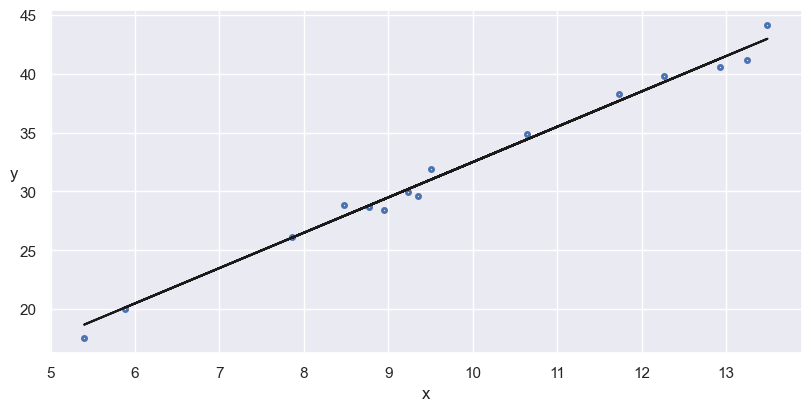

In [3]:
np.random.seed(1)
N = 15

#real parameters have a final '0' in their names.
alpha0  = 2.5
beta0   = 3
sigma_eps = 1


# the x are generared according to N(mean=10, sigma=2)
x        = np.random.normal(10, 2, N)
y_without_noise        = alpha0 + beta0 * x 
noise = np.random.normal(0, sigma_eps, size=N)
y   = y_without_noise + noise


fig = plt.figure(figsize=(8, 4))
ax  = plt.axes()

#plot noisy observations
ax.plot(x, y, 'C0.')
ax.set_xlabel('x')
ax.set_ylabel('y', rotation=0) 

#plot the actual model
ax.plot(x, y_without_noise, 'k'); 

# Probabilistic regression

* Model which account for the uncertainty in the estimation of the parameters ($\beta_0, \beta_1, \sigma_{\epsilon}$)


*  Possibility of adopting a   *robust regression* to deal with outlier observations.
    

* Hierarchical regression: learning regression models for different sources of data for the same problem (e.g.,  different hospitals applying the same treatment) 


# Probabilistic  regression


\begin{align*}
 Y  &= \alpha + X \beta + N(0,\sigma_{\epsilon}) \\
 & \text{equivalently:}\\
Y &\sim N (\mu=\alpha + X \beta,  \sigma_{\epsilon}) \\
\end{align*}


*  We must specify a prior distribution for each of  parameter: $\alpha$, $\beta$, $\sigma_{\epsilon}$.

# Probabilistic  regression

* To simplify the setup of the prior, we specifiy them independently. 


* Thus  our prior understanding of where the model “lives” (intercept) has nothing to do with our prior understanding of the rate at which $Y$ increases with $X$ (slope) and with our prior understanding about  the strength of the relationship  ( $\sigma_{\epsilon}$).


# Priors

* Assuming independence of the parameters,  the  joint prior  of the parameters is the product of their marginal pdfs:

\begin{align}
f(\beta_0,\beta_1,\sigma_{\epsilon})=f(\beta_0)f(\beta_1)f(\sigma_{\epsilon})
\end{align}

# Probabilistic regression

* Both $\beta_0$ and $\beta_1$ are rel-valued parameters, to which we assign a normal prior.

* In general we thus have the model:

\begin{align*}
\alpha & \sim N(\mu_\alpha, \sigma_\alpha) \\
\beta & \sim N(\mu_\beta, \sigma_\beta) \\
\sigma_{\epsilon} & \sim \text{HalfNormal} (0, \xi) \\
\vec{y} & \sim N(\beta_0 + \beta_1 X, \sigma_{\epsilon})
\end{align*}

# Conceptual exercise 

Define priors for a regression model for a bike sharing company, based on  the following information:


*    For every one degree increase in temperature, ridership typically increases by 100 rides; the average increase is between  20 and 180.


*    On an average temperature day (65 - 70 degrees), there are around 5000 riders, though this  could vary between 3000 and 7000.


*    At any given temperature, daily ridership will tend to vary with a moderate standard deviation of 1250 rides.

  


# Prior for the slope ($\beta_1$)


>  Ridership tends to decrease as humidity increases: for every one percentage point increase in humidity level, ridership tends to decrease by 10 rides, though the decrease could vary between 0 and 20.

   
* We formalize this information as:


$$ \beta_1  \sim N(-10, 5)  $$



# Conceptual exercise - $\alpha$


>  On an average humidity day, there are typically around 5000 riders,  the actual number varying between  1000 and 9000.
   
* We have no direct information about the intercept.


*  The prior about the intercept can  be better formalized by  centering $X$, obtained the *centered* variable $X_c = X - \bar{x}$

# Comprehension question

* Why is a Normal prior a reasonable choice for $\alpha$ and $\beta$ ?
* Why isn’t a Normal prior a reasonable choice for $\sigma_{\epsilon}$ ?

# Centering $X$ to set the prior of $\alpha$
   
\begin{align*}
Y & = \alpha + \beta X  \\
Y & = \alpha + \beta (X - \bar{x}) + \beta \bar{x}   \\
Y & = \alpha + \beta X_c + \beta \bar{x}   \\
Y & =  \underbrace{\alpha +  \beta \bar{x}}_{\alpha_c} + \beta X_c   \\
Y & = \alpha_c + \beta X_c    \\
\end{align*}

* The *centered intercept* $\alpha_c =  \alpha +  \beta \bar{x}$ represents the expected value of $Y$ when when $X_c$ equals 0, i.e., when  $X$ is at its average value ($X = \bar{x}$).


* The meaning $\beta$ is not affected by centering $X$.

# Centering $X$ to set the prior of $\alpha$


>  On an average humidity day, there are typically around 5000 riders,  the actual number varying between  1000 and 9000.
   

* We can thus assume $\alpha_c \sim N(5000, 2000)$.






# Conceptual exercise: $\sigma_{\epsilon}$

> Ridership is only weakly related to humidity. At any given humidity, ridership will tend to vary with a large standard deviation of 2000 rides.

* We can  set:

$$ \sigma  \sim \text{HalfNormal} (3000), $$
whose  median is around 2000.

# Conceptual exercise 

* The full model is:

\begin{align*}
\alpha_c & \sim  N (5000, 1000) \\
\beta & \sim N(10, 5) \\
\sigma_{\epsilon} & \sim \text{HalfNormal} (3000)\\ 
Y & \sim N( \alpha_c + \beta X_c, \sigma)
\end{align*}


* To  fit the model it is necessary creating first the  centered variable $X_c$. 

# Your turn: define a model of probabilistic regression 


*    On an average humidity day, there are typically around 5000 riders, the actual number varying between 1000 and 9000.

*    Ridership tends to decrease as humidity increases: for every one percentage point increase in humidity level, ridership tends to decrease by 10 rides, though the decrease could vary between 0 and 20.

 *  Ridership is only weakly related to humidity. At any given humidity, ridership will tend to vary with a large standard deviation of 2000 rides.

# Solution: slope and intercept

\begin{align*}
\beta_{0c} & \sim N(5000, 2000) \\
\beta_1 & \sim N(10, 10) 
\end{align*}

# Solution: slope and intercept

\begin{align*}
\beta_{0c} & \sim N(5000, 1000) \\
\beta_1 & \sim N(10, 10) 
\end{align*}

In [9]:
# Solution: prior for  $\sigma$
#let us obtain by trial and error a scale, such that the median is close to 2000
from scipy.stats import halfnorm 
pd.DataFrame(halfnorm.rvs(scale=3000, size=10000)).describe()


,0
count,10000.000000
mean,2392.475986
std,1803.943211
min,0.852170
25%,928.978734
50%,2035.373983
75%,3477.350856
max,12801.431651


# Solution: the resulting model


\begin{align*}
\beta_{0c} & \sim N(5000, 1000) \\
\beta_1 & \sim N(10, 10) \\
\sigma & \sim HN(3000) \\
\vec{y} & \sim N( \beta_{0c} + \beta_1 X_c, \sigma)
\end{align*}

where $X_c = X - \bar{x}$. 

* $X_c$ is obtained by removing the mean from $X$ and has mean 0.

# If background information is not available

* Sometime no prior information is available.


* We use in this case priors based on the scale of the data (*data-dependent* priors). These are broad priors  whose amount of information used is weak and mainly takes into account the order of magnitude of the variables. 


* See for https://cran.r-project.org/web/packages/rstanarm/vignettes/priors.html for more details.


# Weakly informative, data-dependent priors
see http://mc-stan.org/rstanarm/articles/priors.html

* For the intercept: $\alpha \sim N(\bar{y}, 2 s_y )$:
    * $\bar{y}$ is the mean observed value of $y$
    * $s_{y}$ is the standard deviation of $y$
    * the prior remains the same on the centered data


* For the slope,  $\beta \sim N(0, 2.5 \frac{s_y}{s_x})$
    * a priori the relation has equal probability of being increasing or decreasing
    * the prior is broad (in simple linear regression  $\hat{\beta} = R \frac{s_y}{s_x}$)



* The prior on $\sigma_{\epsilon}$ has median close to $s_y$. This is  broad, since  $\sigma_{\epsilon} << \sigma_y$






# Likelihood  



The likelihood function of the parameters given the independent data $\mathbf{y}$ is defined by the joint pdf of $\mathbf{y}$, which  is the product of the  normal likelihood at each observation:

$$ f(\mathbf{y}|\alpha,\beta,\sigma_{\epsilon})=∏_i^n f(y_i|\alpha,\beta,\sigma_{\epsilon}) =∏_i^n N( y_i| \mu= \alpha + \beta x_i, \sigma=\sigma_{\epsilon}) $$


* The likelihood is thus computed for a specific choice of the parameters $\alpha,\beta,\sigma_{\epsilon}$.


* Via MCMC, it will be efficiently computed for all the most probable posterior values of such parameters.

# Your turn

* Given the parameter values $\alpha$=2, $\beta=10$, $\sigma_{\epsilon}$=1

* Consider the observations: 

| $X$ | $Y$ |
|:-:|:-:|
| 1 | 11 |
| 5 | 50 |


* Compute the likelihood function of these observation, for the assigned value of the parameters.

# Posterior

Thus, building the posterior distribution  would require us to compute the joint posterior pdf:

\begin{align}
 f( \alpha,\beta,\sigma_{\epsilon}) | \mathbf{y})  \propto \text{prior} \cdot \text{likelihood} & =
f(\alpha)f(\beta)f(\sigma_{\epsilon}) \left[ ∏_i^n f(y_i|\alpha,\beta,\sigma_{\epsilon}) \right] 
\end{align}

* That is, evaluating the prior and  likelihood for each possible value of the parameters.

# Posterior

The normalizing constant of  the posterior distribution is untractable:

\begin{align}
f( \alpha,\beta,\sigma_{\epsilon}) | \mathbf{y})  & = \frac{ \text{prior} \cdot \text{likelihood} } { \int \text{prior} \cdot \text{likelihood}} \\
& =
\frac{ f(\alpha) f(\beta) f(\sigma_{\epsilon})  \left[ ∏_i^n f(y_i|\alpha,\beta,\sigma_{\epsilon}) \right] } 
{ \int \int \int f(\alpha) f(\beta) f(\sigma_{\epsilon})  \left[ ∏_i^n f(y_i|\alpha,\beta,\sigma_{\epsilon}) \right] } \\
\end{align}

* We  use Markov chain Monte Carlo simulation to approximate the posterior.




# Linear regression in PyMC3

In [5]:
#we use the data generated at the beginning of the notebook,  with actual parameters alpha  = 2.5;  beta   = 3; sigma_eps = 1
#we have no prior information, hence we use  weakly data-dependent priors.


with pm.Model() as reg_model:
    alpha = pm.Normal ('alpha', mu=0,  sigma= 2 * y.std())
    beta   = pm.Normal ('beta',    mu=0,  sigma= 2 * y.std()/x.std())
    sigma_eps = pm.HalfNormal ('sigma_eps', sd= 1.5 * y.std())
    
    # mu  is expressed  as an additional deterministic variable; this way,  PyMC3 saves  its values  in the trace.
    mu = pm.Deterministic('mu', alpha + beta * x)
    
   #alternative formulation, which does not save mu in the trace
    #y_pred = pm.Normal('y_pred', mu= α + β * x, sd=ε, observed=y)

    y_pred = pm.Normal('y_pred', mu=mu, sd=sigma_eps, observed=y)
    
    trace_g = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_eps, beta, alpha]


/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8829766784690478, but should be close to 0.8. Try to increase the number of tuning steps.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


# Discussion
* The low effective sample size, which  points to sampling issues.


* Let us inspect the  trace of the parameters, omitting the deterministic variable. 


In [6]:
# We passing the names of the variables we want to  analyze using  the 'var_names' argument. Otherwise also the mu values would be shown.
az.summary(trace_g, var_names=['alpha', 'beta', 'sigma_eps'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.796,0.972,0.095,3.805,0.032,0.022,954.0,1206.0,1.0
beta,3.068,0.096,2.886,3.248,0.003,0.002,969.0,1023.0,1.0
sigma_eps,0.873,0.215,0.533,1.248,0.006,0.005,996.0,522.0,1.0


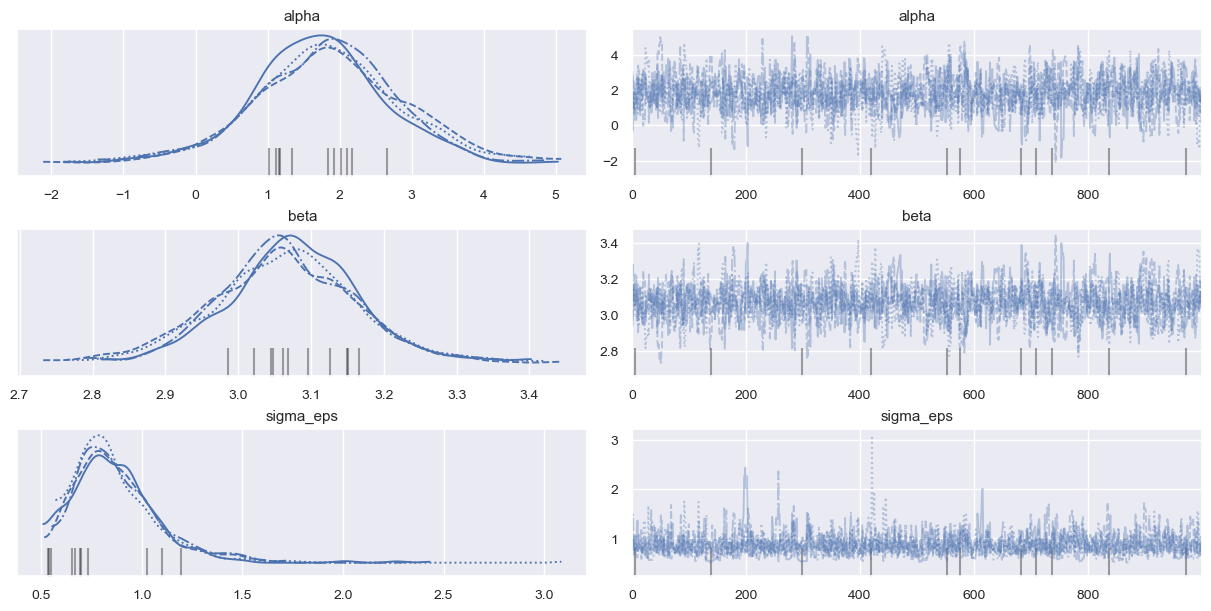

In [7]:
az.plot_trace(trace_g, var_names=['alpha', 'beta', 'sigma_eps']);

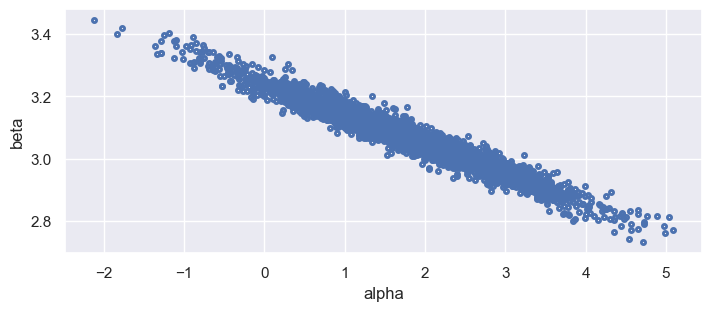

In [8]:
az.plot_pair(trace_g, var_names=['alpha', 'beta',]);

# Correlation between  parameters in the posterior
* The correlation between the samples of $\alpha$ and $\beta$ can be explained as follows.

* By providing on $\alpha$ and $\beta$, we consider a range of  values for both parameters, not only a point estimate. 

* However, given the intercept, the  most likely value of the slope is such that the fitted line  pass through the bulk of the data, practically through  ($\bar{x}, \bar{y}$).

# Correlation between  parameters in the posterior


* An increase in the slope means a decrease of the intercept and vice versa. This causes the correlation between parameters.  

* The shape of the posterior of $\alpha, \beta$ is almost  diagonal. 

* We are in practice spinning a  line, by pivoting it around the point ($\bar{x}, \bar{y}$) which represents the center of the data.

* Samples  become highly autocorrelated and  sampling becomes slow. 

# Centering $X$

* We remove the posterior correlation between $\alpha$ and $\beta$  by using $X_c$ instead of $X$.


* The mean of  $X_c$ is 0; the central point of the data becomes  (0, $\bar{y}$).


* This is the point arond which the different plausible lines spin; after centering  it corresponds to the intercept. 


* Hence the slope can vary independently from the intercept.


*  This also helps in interpreting the intercept, as already discussed. 

# Standardizing $X$ and $Y$
Standardizing is  common  in statistics and ML since many algorithms are numerically  stable when the data is standardized.  This transformation is achieved by centering the data and dividing it by the standard deviation:

We transform  each data point as:
\begin{align}
x_i' & = \frac{x_i-\bar{x}}{\sigma_x}\\
y_i' & = \frac{y_i-\bar{y}}{\sigma_y}
\end{align}


# Standardizing the data
*  Standardizing the data allow us to use  Z-scores, that is, in units of standard deviations.


* A value of -1.3 in Z-score units is  1.3 standard deviations below the mean, whatever the scale of the data.


* This is useful dealing with several variables, whose Z-score can be compared.


* You center or standardize the data  depending on whether you prefer to interpret the model in the original scale or using Z-scores.


*  In the following we *center* the data.

In [9]:
x_c   =  (x - x.mean())
m_y  =  y.mean()
s_y    =  y.std()


with pm.Model() as model_std:
    #priors on coefficients, for centered data.
    # we call alpha_c the parameter to denote that it refers to centered data.
    alpha_c = pm.Normal ('alpha_c', mu= m_y, sd=2 * s_y)
    beta        = pm.Normal ('beta',        mu=0,  sd= 2 * s_y)
    sigma_eps = pm.HalfNormal ('sigma_eps', sd = 1.5 * s_y)
    
    #deterministic variable which keeps track of the prediction made for each x_c
    mu              = pm.Deterministic('mu', alpha_c + beta * x_c)
    y_pred       = pm.Normal('y_pred', mu=mu, sd=sigma_eps, observed=y)

    trace_c = pm.sample(return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_eps, beta, alpha_c]


/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


In [10]:
#The estimates of beta and sigma_eps are the same of the non-centered case.
#The estimates of the intercept is different because now the data  are centered.
#The ess is now very large: sampling is now effective.

az.summary(trace_c, var_names=["alpha_c", "beta", "sigma_eps"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_c,31.995,0.233,31.548,32.436,0.004,0.003,3486.0,2512.0,1.0
beta,3.071,0.094,2.890,3.245,0.002,0.001,3208.0,2550.0,1.0
sigma_eps,0.867,0.192,0.555,1.215,0.004,0.003,2702.0,2249.0,1.0


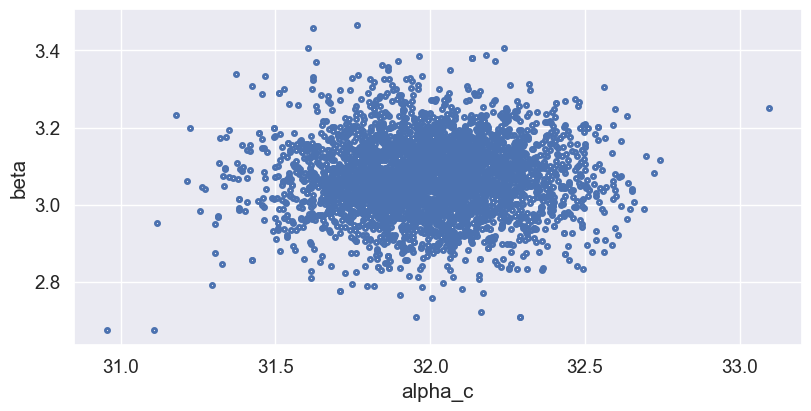

In [11]:
# No more correlation in the posterior.
az.plot_pair(trace_c, var_names=['alpha_c', 'beta',], figsize=[8,4]);

# Interpreting the  model

In [12]:
# Posterior uncertainty:  the 95% posterior credible interval in the parameters
az.summary(trace_c, hdi_prob=0.95, var_names=['alpha_c', 'beta'])

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_c,31.995,0.233,31.524,32.450,0.004,0.003,3486.0,2512.0,1.0
beta,3.071,0.094,2.873,3.247,0.002,0.001,3208.0,2550.0,1.0


In [13]:
# Extracting the posterior mean of the parameters

# to work with samples, we first  extract the dataset of samples.
idata = az.extract_dataset(trace_c)

#idata.alpha.values access the samples of alpha; likewise for idata.beta.values
alpha_c_hat =  idata.alpha_c.values.mean() # 32.004
beta_hat   =  idata.beta.values.mean() # 3.07


# The posterior mean relation is thus:  y  = 32.004 + 3.07 * x_c

# Posterior uncertainty

* To keep track the uncertainty in $\alpha_c$ and  $\beta$ we will use the posterior samples.

*  The trace contains  $S$  samples (typically $S$=4000).


* Let us denote the $s$-th sample as   $< \alpha_{c_s}, \beta_s, \sigma_{\epsilon_s}>$.


* Each parameter set constitues an alternative plausible model of the linear  relationship.

# Visualizing the learned linear relationship: posterior mean and uncertainty

*  The average line is obtained by using the posterior mean of $\alpha_c$ and $\beta$:

\begin{align}
\hat{\alpha}_c & =  \frac{1}{S} \sum_s \alpha_{c_s} \\
\hat{\beta} & = \frac{1}{S} \sum_s \beta_s \\
\end{align}

* We are using the hat to denote the posterior means  (previously we used it  to denote the parameters  estimated by minimizing the sum of the squared errors).


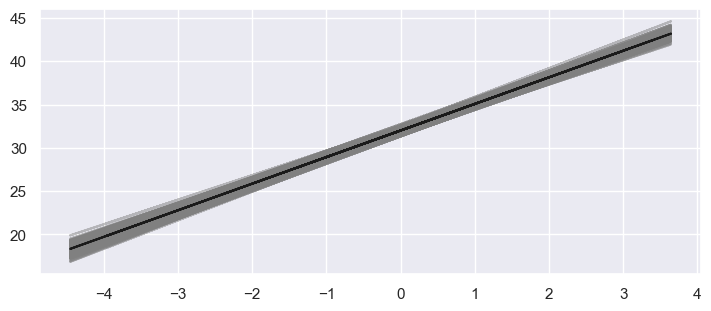

In [14]:
#to quickly compute the plot, we pick one sample every 10 
chosen_samples = range(0, len(idata.alpha_c.values),10)

#The uncertainty is shown by plotting a different line for each sample of (alpha_c, beta).
plt.plot(x_c,  idata.alpha_c.values[chosen_samples] + idata.beta.values[chosen_samples] * x_c[:, np.newaxis], c='gray', alpha=0.5)

#Mean value of the regression line
alpha_hat =  idata.alpha_c.values.mean()
beta_hat   =  idata.beta.values.mean()
plt.plot(x_c, alpha_c_hat + beta_hat * x_c, c='k',label='y = {:.2f} + {:.2f} * x'.format(alpha_hat, beta_hat));

#  Evaluating the  association between $X$ and $Y$

* We have large evidence of positive association between $x$ and $y$, i.e., that $\beta$>0:
    * in our visual examination of the posterior plausible scenarios, all exhibited positive associations.

In [15]:
#  Evaluating the positive association between $x$ and $y$
# the 95% HDI of $\beta$  t only contains positive values.
az.summary(trace_c, var_names="beta")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta,3.071,0.094,2.89,3.245,0.002,0.001,3208.0,2550.0,1.0


# Posterior  prediction 

Which is  the  prediction of  $y$  for the new value  (already   centered) $x_{new}=0.5$ ?  

* The simplest answer is to use the posterior mean of the parameters:
$$ \hat{y}_{new} = 32.002 + 3.073 \cdot 0.5 = 33.54 $$


Yet this ignores two sources of variability:
   * the effect the noise, which cause the observations to deviate from the model line;
   * the posterior variability in parameters 

# Posterior predictive distribution
* To quantify the uncertainty of the prediction, we can use the posterior samples $<\alpha_{c_s}, \beta_{s} , \sigma_s >$, where $s$ is the index of the sample.



* We  then compute for each parameter sample:
$$
y_s^{\text{new}}  \; \sim \; N\left(\mu_s, \sigma_s \right) \;\; \text{ with } \;\; \mu_s = \alpha_{c,s} + \beta_s \cdot 0.5.
$$



* This is the *posterior predictive distribution* of $y^{\text{new}}$


# Posterior predictive distribution
Each parameter set produces a unique prediction according to:
$$y_{new}^s = \alpha_{c,s} + \beta_s \cdot x_{new} + N(0, \sigma)$$

$$
\left[
\begin{array}{lll} 
\alpha^{(1)} & \beta^{(1)} & \sigma^{(1)} \\
\alpha^{(2)} & \beta^{(2)} & \sigma^{(2)} \\
\vdots & \vdots & \vdots \\
\alpha^{(4000)} & \beta^{(4000)} & \sigma^{(4000)} \\
\end{array}
\right]
\;\; \longrightarrow \;\;
\left[
\begin{array}{l} 
y_{\text{new}}^{(1)} \\
y_{\text{new}}^{(2)} \\
\vdots \\
y_{\text{new}}^{(4000)} \\
\end{array}
\right]
$$


In [16]:
x_test = 0.5

# index of the samples; this time we take them all.
sample_idx = range(0, len(idata.alpha_c.values))

#draw the noise, using the posterior samples of sigma_eps.
sigma_samples = idata.sigma_eps.values[sample_idx]  
noise_samples  = np.random.normal(loc=0, scale=sigma_samples)

#as many prediction as there are posterior samples
preds = idata.alpha_c.values[sample_idx] + idata.beta.values[sample_idx] * x_test +  noise_samples

#describe the posterior predictive distribution for the provided x_test
pd.DataFrame(preds).describe (percentiles=[.025, .05, .5, .95, .975])

,0
count,4000.000000
mean,33.524244
std,0.912642
min,29.546676
2.5%,31.706855
5%,32.045405
50%,33.520196
95%,35.040696
97.5%,35.381529
max,36.927663


In [17]:
# Posterior predictive in pymc3.
# This computes the posterior predictive distribution for each x of the training set, using a chosen number of samples.
# To keep the computation fast, I set 1000 samples. 
ppc_std= pm.sample_posterior_predictive(trace_c, model=model_std, samples=1000)

/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


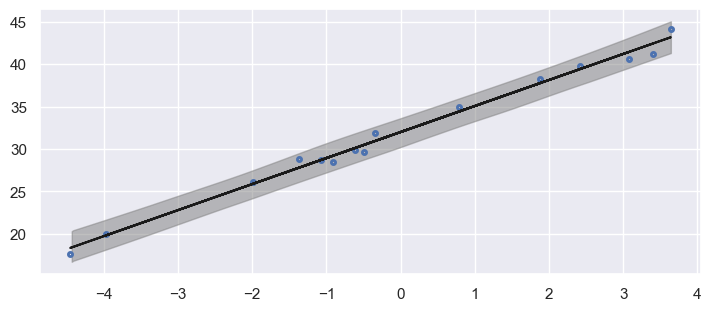

In [18]:
# here we plot the posterior predictive on the training data and we compare it with the actual observations

#plot the data
plt.plot(x_c, y, 'b.')

#plot the mean regression line
plt.plot(x_c, alpha_c_hat + beta_hat * x_c, c='k',
            label=f'y = {alpha_c_hat:.2f} + {beta_hat:.2f} * x')

#plot the hdi for each x
az.plot_hdi(x_c, ppc_std['y_pred'],  color='gray');

# Robust linear regression

# Robust linear regression


* Gaussianity is often a reasonable approximation. 


* But sometimes the  Gaussian assumption fails, for example, in the presence of outliers. 


* As already discussed, this is because it is thin-tailed.


* The Student's t-distribution effectively deals with outliers and provides  a more robust inference. 


* This  idea can be applied also to linear regression.


# Case study


* The data set below contains an outlier.


* It is a data set from the Anscombe quartet: four data sets whose summary statistics are identical, but vary considerably when graphed.

<img src='img/anscombe3.png' width=400 align="center" >

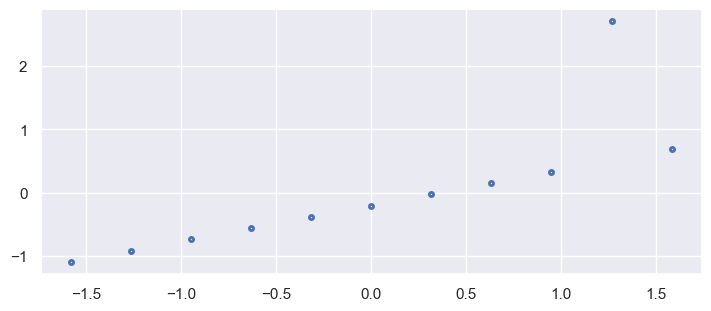

In [19]:
data = pd.read_csv('data/anscombe.csv')

#by x_3 and y_3 we denote the explanatory and response variable for the Anscombe data set.
#The 3 refers to the fact that this is the third example within the original paper by Anscombe.
x_3  = np.array(data[data.group == 'III']['x'].values)
y_3  = np.array(data[data.group == 'III']['y'].values)

#to show a different implementation, we  standardize the data.
x_3_std = (x_3  - x_3.mean()) / x_3.std()
y_3_std = (y_3  - y_3.mean()) / y_3.std()
plt.plot(x_3_std, y_3_std, 'b.');

# Robust linear regression in PyMC3

In [32]:
with pm.Model() as st_model:
    #notice the use of weakly, data-dependent prior for *standardized* data
    # st stands for Student
    alpha_st            = pm.Normal ('alpha_st', mu=0, sd=2)
    beta_st               = pm.Normal ('beta_st',   mu=0,  sd=2)
    sigma_eps_st   = pm.HalfNormal ('sigma_eps_st', sd=1.5)
    y_pred_st            = pm.StudentT  ('y_pred_st', mu= alpha_st + beta_st * x_3_std,  sigma=sigma_eps_st,  nu=4, observed=y_3_std)
    st_trace      = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_eps_st, beta_st, alpha_st]


/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


In [34]:
with pm.Model() as gaussian_model:
    #priors on intercept, slope and standard deviation of noise for standardized data
    alpha            = pm.Normal ('alpha', mu=0, sd=1)
    beta              = pm.Normal ('beta',   mu=0,  sd=1)
    sigma_eps   = pm.HalfNormal ('sigma_eps', sd=1)
    
    y_pred               = pm.Normal ('y_pred', mu= alpha + beta * x_3_std,  sd=sigma_eps, observed=y_3_std)    
    gaussian_trace   = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_eps, beta, alpha]


/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/giorgio/opt/anaconda3/envs/bda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


In [35]:
# We are fitting a line to a perfectly aligned set of points, apart from the outlier.
#The gaussian model reports  large uncertainty on the estimates.
# The uncertainty is narrower with the robust model.
# Also, the estimates of the parameters are rather different between the two models.

pd.concat( [az.summary(gaussian_trace), az.summary(st_trace)])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.004,0.215,-0.414,0.402,0.004,0.003,3035.0,2538.0,1.00
beta,0.772,0.223,0.351,1.196,0.004,0.003,2804.0,2089.0,1.00
sigma_eps,0.717,0.188,0.409,1.052,0.004,0.003,2967.0,2530.0,1.00
alpha_st,-0.199,0.001,-0.202,-0.197,0.000,0.000,2297.0,1484.0,1.00
beta_st,0.564,0.001,0.562,0.567,0.000,0.000,1966.0,1293.0,1.00
sigma_eps_st,0.004,0.003,0.001,0.007,0.000,0.000,1020.0,1127.0,1.01


# Robust vs non-robust fit
* We now compare the mean fit of the robust model and the Gaussian model.

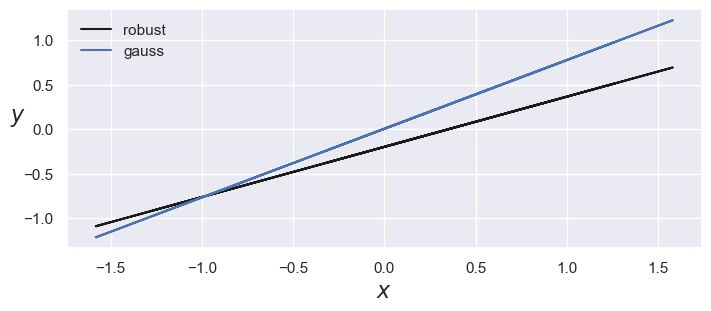

In [37]:
#posterior mean of the parameters, robust model
post_st         = az.extract_dataset(st_trace)
alpha_st_hat       = post_st.alpha_st.values.mean()
beta_st_hat         = post_st.beta_st.values.mean()

#posterior mean of the parameters, gaussian model
post_gauss        = az.extract_dataset(gaussian_trace)
alpha_gauss_hat      = post_gauss.alpha.values.mean()
beta_gauss_hat        = post_gauss.beta.values.mean()

# plotting robust regression, using for simplicity the posterior mean of the parameters
plt.plot(x_3_std, alpha_st_hat + beta_st_hat * x_3_std, c='k', label='robust')
plt.plot(x_3_std, alpha_gauss_hat + beta_gauss_hat * x_3_std, c='b', label='gauss')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)
plt.legend();

# Discussion

* The least-squares fit tries to compromise and include all points.


* The robust model automatically discards the outlier and fits a line that passes exactly through all the remaining points. 


* This is  a  peculiar dataset, but the message remains for more real and complex ones. 


* A Student's t-distribution, due to its heavier tails, is able to give less importance to points that are far away from the bulk of the data, filtering outliers in an automatic way.

* We will see how we can choose among different competing models fitted on the same data in a rigorous way by adopting the WAIC criterion.

# Exercise 1

* In the following model, what is the linear model? What is the likelihood and how many parameters are there in the posterior distribution?

$$
\alpha \sim Normal(0, 10) \\
\beta \sim Normal(0, 1) \\
\sigma_{\epsilon} \sim HalfNormal(25) \\
\mu = \alpha + \beta x \\
y \sim Normal(\mu, \sigma_{\epsilon}) \\
$$

# Exercise: case study


* Using the `howell` dataset (available at data/howell.csv) create a linear model of the weight ($x$) against the height ($y$). Exclude subjects that are younger than 18. Explain the results.


* For four subjects, we get the weights (45.73, 65.8, 54.2, 32.59), but not their heights. Predict the height for each subject, together with their HDIs of 50% and 94%.



* Repeat the exercise  this time including those below 18 years old. Explain the results.

